In [14]:
import sys
import jax
import jax.numpy as jnp
from jax import random
from functools import partial
import chex
import numpy as np

sys.path.append("../")

from neat_jax import (
    Network,
    ActivationState,
    make_network,
    plot_network,
    Mutations,
    update_depth,
    cartesian_product,
)

In [7]:
topology_config_0 = {
    "max_nodes": 10,
    "senders": jnp.array([0, 1, 2, 4]),
    "receivers": jnp.array([4, 4, 3, 3]),
    "weights": jnp.array([1, 1, 1, 1]),
    "activation_fns": jnp.array([0, 0, 0, 0, 0]),
    "node_types": jnp.array([0, 0, 0, 2, 1]),
    "inputs": jnp.array([0.5, 0.8, 0.2]),
    "output_size": 1,
}
mutation_config_certain = {
    "weight_shift_rate": 1,
    "weight_mutation_rate": 1,
    "add_node_rate": 1,
    "add_connection_rate": 1,
}
mutation_config_null = {
    "weight_shift_rate": 0.0,
    "weight_mutation_rate": 0.0,
    "add_node_rate": 0.0,
    "add_connection_rate": 0.0,
}
mutation_config_0_5 = {
    "weight_shift_rate": 0.5,
    "weight_mutation_rate": 0.5,
    "add_node_rate": 0.5,
    "add_connection_rate": 0.5,
}

key = random.PRNGKey(0)
activation_state, net = make_network(**topology_config_0)
net

input_size: 3
output_size: 1
max_nodes: 10
node_indices: [0 1 2 3 4 5 6 7 8 9]
node_types: [0 0 0 2 1 3 3 3 3 3]
activation_fns: [0 0 0 0 0 0 0 0 0 0]
senders: [  0   1   2   4 -10 -10 -10 -10 -10 -10]
receivers: [  4   4   3   3 -10 -10 -10 -10 -10 -10]
weights: [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


In [8]:
configs = [mutation_config_null, mutation_config_0_5, mutation_config_certain]
seeds = [0, 1, 0]
max_nodes = topology_config_0["max_nodes"]

for i in range(3):
    config = configs[i]
    key = random.PRNGKey(seeds[i])

    print("-" * 20)
    mutations = Mutations(max_nodes=max_nodes, **config)
    print("Weight shift weights:")
    print(mutations.weight_shift(key, net).weights)
    print("Weight mutation weights:")
    print(mutations.weight_mutation(key, net).weights)
    print("Add node network")
    print(mutations.add_node(key, net, activation_state, 1))
    print("Add connection network")
    print(mutations.add_connection(key, net, activation_state))

--------------------
Add node network
input_size: 3
output_size: 1
max_nodes: 10
node_indices: [0 1 2 3 4 5 6 7 8 9]
node_types: [0 0 0 2 1 3 3 3 3 3]
activation_fns: [0 0 0 0 0 0 0 0 0 0]
senders: [  0   1   2   4 -10 -10 -10 -10 -10 -10]
receivers: [  4   4   3   3 -10 -10 -10 -10 -10 -10]
weights: [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
values: [0.5 0.8 0.2 0.  0.  0.  0.  0.  0.  0. ]
toggled: [1 1 1 0 0 0 0 0 0 0]
activation_counts: [0 0 0 0 0 0 0 0 0 0]
has_fired: [0 0 0 0 0 0 0 0 0 0]
node_depths: [0 0 0 0 0 0 0 0 0 0]
outdated_depths: True
(, )
Add connection network
input_size: 3
output_size: 1
max_nodes: 10
node_indices: [0 1 2 3 4 5 6 7 8 9]
node_types: [0 0 0 2 1 3 3 3 3 3]
activation_fns: [0 0 0 0 0 0 0 0 0 0]
senders: [  0   1   2   4 -10 -10 -10 -10 -10 -10]
receivers: [  4   4   3   3 -10 -10 -10 -10 -10 -10]
weights: [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
values: [0.5 0.8 0.2 0.  0.  0.  0.  0.  0.  0. ]
toggled: [1 1 1 0 0 0 0 0 0 0]
activation_counts: [0 0 0 0 0 0 0 0 0 0]
has_fire

In [ ]:
def mutate(
    mutations,
    key: random.PRNGKey,
    net: Network,
    activation_state: ActivationState,
    scale_weights: float = 0.1,
) -> tuple[Network, ActivationState]:
    w_mutation_key, w_shift_key, node_key, connection_key = random.split(key, num=4)

    print(1)
    net = mutations.weight_mutation(w_mutation_key, net, scale_weights)
    print(2)
    net = mutations.weight_shift(w_shift_key, net, scale_weights)
    print(3)
    net = mutations.add_node(node_key, net, scale_weights)
    print(4)
    net, activation_state = mutations.add_connection(
        connection_key, net, activation_state, scale_weights
    )

    return net, activation_state

In [ ]:
w_mutation_key, w_shift_key, node_key, connection_key = random.split(key, num=4)
net = mutations.weight_mutation(w_mutation_key, net)
net = mutations.weight_shift(w_shift_key, net)
net, activation_state = mutations.add_node(node_key, net, activation_state)

1
2
3


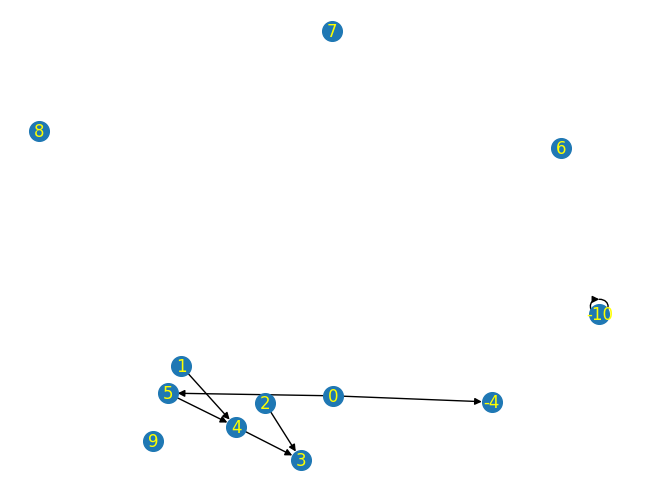

In [ ]:
plot_network(net)

In [ ]:
activation_state

values: [0.5 0.8 0.2 0.  0.  0.  0.  0.  0.  0. ]
toggled: [1 1 1 0 0 0 0 0 0 0]
activation_counts: [0 0 0 0 0 0 0 0 0 0]
has_fired: [0 0 0 0 0 0 0 0 0 0]
node_depths: [0 0 0 0 0 0 0 0 0 0]
outdated_depths: True


In [ ]:
assert

problem: here a node is added between 0 and 4 => we get 0 -> 5 & 5 -> 4

the activation state is not updated accordingly as the old connection is still active and not the new one

solution => add an array to the activation state tracking the position of input connections


In [ ]:
def _carry(required_activations: jnp.ndarray, receiver: int):
    return (
        jax.lax.cond(
            receiver < 0,
            lambda _: required_activations,  # bypass this step for non-receiver nodes
            lambda _: required_activations.at[receiver].add(1),
            operand=None,
        ),
        None,
    )

added_node, activation_state = mutations.add_node(node_key, net, activation_state)
jax.lax.scan(_carry, (jnp.zeros(max_nodes, dtype=jnp.int32)), added_node.receivers)

(Array([0, 0, 0, 2, 2, 1, 0, 0, 0, 0], dtype=int32), None)